In [2]:
import ujson as json
fb_ad_sets = json.load(file('facebook_ad_sets.json'))

In [63]:
#Preprocessing
from wordcloud import WordCloud
text = ''
text_dispadd = ''
text_street = ''
text_desc =''
text_fb = []
for ind, row in enumerate(fb_ad_sets):
    text_fb.append(row["fb_name"].rsplit("[", 1)[0])
text_fb = " ".join(text_fb)

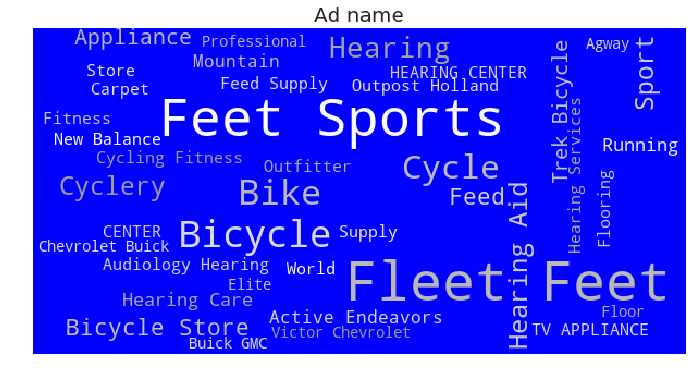

In [67]:
def clean_line(text_, meaningless_ = ['INC','LLC', 'Co', 'Inc', 'Center','Shop','Company']):
    for word in meaningless_:
        word = ' '+word
        if word in text_:
            text_ = text_.replace(word, "")
    return text_

import random

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='blue', width=600, height=300,
                      max_font_size=50, max_words=40).generate(clean_line(text_fb))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("Ad name", fontsize=20)
plt.axis("off")
plt.show()

In [48]:
from wordcloud import WordCloud

def get_targetting_(cat='interests'):
    text = ''
    text_dispadd = ''
    text_street = ''
    text_desc =''
    text_fb = []
    for row in fb_ad_sets:
        if 'fb_targeting' in row:
            fb_t = json.loads(row['fb_targeting'])
            if cat in fb_t:
                for dic in fb_t[cat]:
                    text_fb.append("_".join(dic['name'].split(" ")))
    text_fb = " ".join(text_fb)
    return text_fb

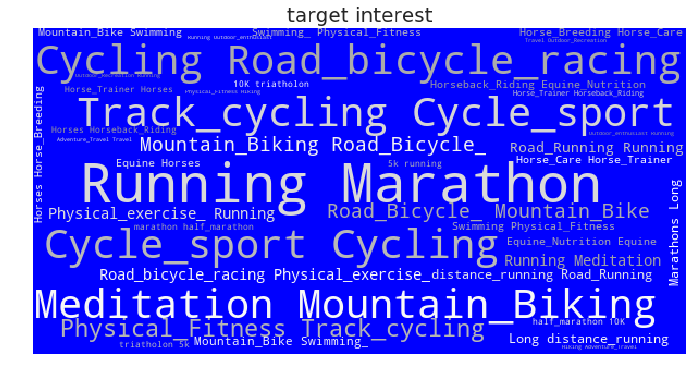

In [49]:
import random

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='blue', width=600, height=300,
                      max_font_size=50, max_words=40).generate(get_targetting_('interests'))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("target interest", fontsize=20)
plt.axis("off")
plt.show()

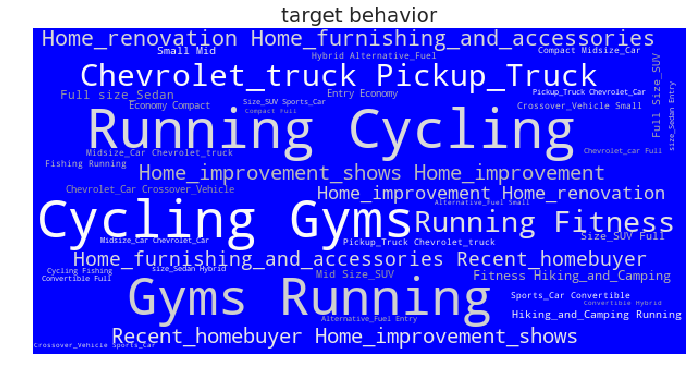

In [51]:
import random

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='blue', width=600, height=300,
                      max_font_size=50, max_words=40).generate(get_targetting_('behaviors'))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("target behavior", fontsize=20)
plt.axis("off")
plt.show()

In [62]:
fb_ad_sets[12]['fb_start_time']

1464280420

In [273]:
from collections import defaultdict
newdat = []
for row in fb_ad_sets:
    newrow = defaultdict(lambda: 0) 
    newrow['fb_optimization_goal']=row['fb_optimization_goal']
    newrow['duration']=(row['fb_end_time']-row['fb_start_time'])
    if 'insights_cache' in row:
        insights_cache = row['insights_cache'][0]
        if isinstance(insights_cache, basestring):
            insights_cache = json.loads(insights_cache)
        newrow['impressions'] = int(insights_cache['impressions'])
        if u'objective' in insights_cache:
            newrow['objective'] = insights_cache[u'objective']
        if u'total_unique_actions' in insights_cache:
            newrow['actions'] = int(insights_cache[u'total_unique_actions'])
        if u'total_unique_actions' in insights_cache:
            newrow['actions'] = int(insights_cache[u'total_unique_actions'])
        if u'website_clicks' in insights_cache:
            newrow['clicks'] = int(insights_cache[u'website_clicks'])
        newrow['spend'] = float(insights_cache[u'spend'])
    if 'fb_targeting' in row:
        fb_t = json.loads(row['fb_targeting'])
        if "geo_locations" in fb_t and len(fb_t["geo_locations"])>1:
            print fb_t["geo_locations"]
            newrow['hasgeo']=1
    if u'retailer_id' in row:
        newrow['retailer_id'] = row[u'retailer_id']
    if 'fb_targeting' in row:
        fb_t = json.loads(row['fb_targeting'])
        if 'interests' in fb_t:
            for dic in fb_t['interests']:
                target_interest = dic['name'].lower()
                if ('cycl' in target_interest) or ('bike' in target_interest) or ('biking' in target_interest):
                    newrow['cycle_related']=1
                    newrow['exercise_related']=1
                if ('gym' in target_interest) or ('fitness' in target_interest) or ('renovation' in target_interest):
                    newrow['exercise_related']=1
                elif ('home' in target_interest) or ('furni' in target_interest):
                    newrow['home_related']=1
                elif ('fish' in target_interest):
                    newrow['fish_related']=1
                elif ('convertible' in target_interest) or (' truck' in target_interest) or (' car' in target_interest) or (' suv' in  target_behavior):
                    newrow['vehicle_related']=1
                #else:
                #    newrow['other_related']=1
        else:
            newrow['NO interest targetting']=1

        if 'behaviors' in fb_t:
            for dic in fb_t['behaviors']:
                target_behavior = dic['name'].lower()
                if ('cycl' in target_behavior) or ('bike' in target_behavior) or ('biking' in target_behavior):
                    newrow['target_cycle_related']=True
                    newrow['target_exercise_related']=True
                if 'gym' in target_behavior or ('sports' in target_behavior and 'sports car' not in target_behavior):
                    newrow['target_exercise_related']=True
                elif ('home' in target_behavior):
                    newrow['target_home_related']=True
                elif ('convertible' in target_behavior) or (' truck' in  target_behavior or ' car' in  target_behavior or ' suv' in  target_behavior):
                    newrow['target_vehicle_related']=True
                #else:
                #    newrow['target_other_related']=1
        else:
            newrow['NO behavior targetting']=1
                
    newdat.append(newrow)

In [274]:
column_names = set()
for row in newdat:
    column_names |= set(row.keys())
column_names = list(column_names)

In [275]:
import pandas as pd
impressions = [row['impressions']*1.0/row['spend'] for row in newdat]
fb_dat = pd.DataFrame([map(row.__getitem__, column_names) for row in newdat], columns=column_names)

In [276]:
def flatten_dict(dic):
    for k,v in dic.iteritems():
        if isinstance(v, int):
            yield k,v
        elif isinstance(v,basestring):
            v = v.replace("-","")
            yield k+" "+v, 1
        elif isinstance(v,dict):
            for u, w in flatten_dict(v):
                yield (k+" "+u).replace("-",""), w
        elif isinstance(v, bool):
                yield k, int(v)
    
def condense_attributes(dic):
    return dict(flatten_dict(dic))

In [277]:
from sklearn import base
import operator
class TargetTagSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    def __init__(self):
        self.col_names = [_name for _name in column_names if ('_related' in _name) 
                                                   or ('fb_optimization' in _name)
                                                   or ('objective' in _name)
                                                   or _name.startswith('NO')] 
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        return [condense_attributes(dict(zip(column_names, map(row.__getitem__, column_names)))) for row in X]

In [278]:
from sklearn import base
class EnsembleTransformer(base.BaseEstimator, base.TransformerMixin):    
    def __init__(self, base_estimator, residual_estimators, alpha=0.01):
        self.base_estimator = base_estimator # (alpha=alpha)
        self.residual_estimators = residual_estimators
    
    def predict(self, X):
        return np.sum(self.transform(X), axis=1)
    
    def fit(self, X, y):
        self.base_estimator.fit(X, y)
        y_err = y - self.base_estimator.predict(X)
        for est in self.residual_estimators:
            est.fit(X, y_err)
        return self
    
    def transform(self, X):
        all_ests = [self.base_estimator] + list(self.residual_estimators)
        return np.array([est.predict(X) for est in all_ests]).T

In [279]:
from sklearn.pipeline import Pipeline
from sklearn import neighbors, model_selection
from sklearn import datasets, linear_model
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

pipe = Pipeline([
    ('ColumnSelect', TargetTagSelectTransformer()),
   ('dv', DictVectorizer()),
  #  ('tf', TfidfTransformer()),
    ('ensemble', EnsembleTransformer(
                linear_model.LinearRegression(fit_intercept=True),
                [svm.SVR()])),
    ('blend',linear_model.Ridge())
    ])

cv = model_selection.ShuffleSplit(n_splits=5)

target_est = model_selection.GridSearchCV(
    pipe,
    {"blend__alpha": np.array(range(1,9, 1))/10.0},
    cv=cv,  # 5-fold cross validation
    n_jobs=1,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_median_absolute_error'
)
target_est.fit(newdat, impressions)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.1, train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('ColumnSelect', TargetTagSelectTransformer()), ('dv', DictVectorizer(dtype=<type 'numpy.float64'>, separator='=', sort=True,
        sparse=True)), ('ensemble', EnsembleTransformer(alpha=None,
          base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=Fals...it_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'blend__alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_median_absolute_error', verbose=0)

## What is more effective? Interest Targetting  or Behavioral Targetting 

In [282]:
dd({'NO behavior targetting': 1,
             'NO interest targetting': 1})

In [284]:
def dd(dic):
    ans = defaultdict(int)
    ans.update(dic)
    return ans

target_est.predict([dd({'NO behavior targetting': 1,
             'NO interest targetting': 1})])

array([ 94.76980165])

In [286]:
target_est.predict([dd({'exercise_related': 1,'home_related':1, 'fish_related':1, 'vehicle_related':1, 'NO behavior targetting': 1})])

array([ 107.77305815])

In [285]:
target_est.predict([dd({'target_exercise_related': 1,'target_home_related':1, 'target_fish_related':1, 'target_vehicle_related':1, 'NO interest targetting': 1})])

array([ 62.04683375])

In [271]:
newdat[0]

defaultdict(<function __main__.<lambda>>,
            {'NO behavior targetting': 1,
             'NO interest targetting': 1,
             'actions': 45,
             'clicks': 59,
             'cycle_related': 0,
             'duration': 864000,
             'exercise_related': 0,
             'fb_optimization_goal': u'POST_ENGAGEMENT',
             'fish_related': 0,
             'home_related': 0,
             'impressions': 1501,
             'objective': u'NONE',
             'other_related': 0,
             'retailer_id': 26564,
             'spend': 24.3,
             'target_cycle_related': 0,
             'target_exercise_related': 0,
             'target_home_related': 0,
             'target_other_related': 0,
             'target_vehicle_related': 0,
             'vehicle_related': 0})

## Does duration of ad campaign affect performance? 
In particular, the two graphs below show no evidence that longer campaigns have better performance to spending ratio

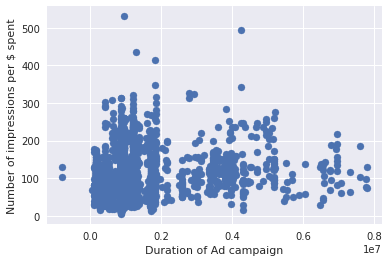

In [256]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(fb_dat['duration'], fb_dat['impressions']/fb_dat['spend'])
plt.xlabel('Duration of Ad campaign')
plt.ylabel('Number of impressions per $ spent')
plt.show()

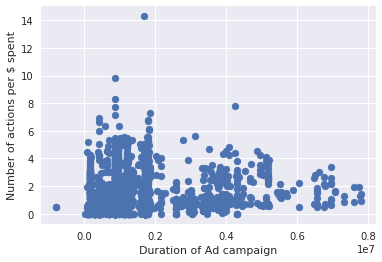

In [255]:
plt.scatter(fb_dat['duration'], fb_dat['actions']/fb_dat['spend'])
plt.xlabel('Duration of Ad campaign')
plt.ylabel('Number of actions per $ spent')
plt.show()

In [182]:
def get_impression(dic):
    return dic['impressions']/dic['spend']

In [159]:
print (fb_dat.impressions[fb_dat["NO behavior targetting"]]/fb_dat.spend[fb_dat["NO behavior targetting"]]).median(), fb_dat.impressions[fb_dat["NO behavior targetting"]==False].median() 

93.8773333333 1214.0


In [143]:
print fb_dat.impressions[fb_dat["NO interest targetting"]].median(), fb_dat.impressions[fb_dat["NO interest targetting"]==False].median() 

1593.5 2245.0


In [147]:
print (fb_dat.actions[fb_dat["NO behavior targetting"]]/fb_dat.impressions[fb_dat["NO behavior targetting"]]).median(), (fb_dat.actions[fb_dat["NO behavior targetting"]==False]/fb_dat.impressions[fb_dat["NO behavior targetting"]==False]).median()

 0.0164203612479 0.0111524163569


In [148]:
print (fb_dat.actions[fb_dat["NO interest targetting"]]/fb_dat.impressions[fb_dat["NO interest targetting"]]).median(), (fb_dat.actions[fb_dat["NO behavior targetting"]==False]/fb_dat.impressions[fb_dat["NO interest targetting"]==False]).median()

0.0159418306069 0.0119744544971
